# Customer Segmentation & Recommendation System

<span style="color:blue;"><b><H2>Problem Statement</H2></b></span>

In this project, we will invest ourself in the thriving sector of <b>online retail</b> by analyzing a dataset that is based on transaction taken form a UK-based retailer. The dataset is present in [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/352/online+retail). The dataset is a bit old comprising the data from the year 2010 and 2011.However, the data that has been collected is still relevent for our project as the data senario in the retail secor hasn't changed much. The primary objective of the project is to amplify the efficiency of marketing strategies and boost sales through <b>Customer Segmentation</b>.For this purpose we will be using the concept of <b>K-Means Clustering</b> algorithm.

<span style="color:orange;"><b>K-means clustering:</b></span>
K-means clustering is a method used to group data points into clusters, or groups, based on their similarity. Here’s a simple breakdown:

Start with a Goal: You decide how many clusters (groups) you want to create (e.g., 3 clusters for customer types: budget, moderate, and luxury).

Place Initial Centers: K-means randomly picks points to act as the "center" of each cluster.

Assign Data Points to Centers: Each data point is assigned to the nearest cluster center, grouping similar points together.

Update Centers: After all points are assigned, K-means calculates the average (center) of each group and moves the cluster centers there.

Repeat: Steps 3 and 4 are repeated until the cluster centers stop moving, meaning the groups are stable.

After clustering the project intend to develop a <b>recommendation system </b> that will suggest top-selling products to customers within each segment who haven't purchased those items yet, ultimately enhancing marketing efficacy and fostering increased sales.


<span style="color:orange;"><b><H3>Objectives</H3></b></span>

* <b>Data cleaning & Tranformation</b> :Clean the dataset by handling missing values,duplicates, and outliers, preparing it for the effective clustering.
* <b> Feature Engineering </b>: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.
* <b> Data preprocessing </b>: Undertake feature scaling and dimensionality reduction to streamline the data enhancing the efficiency of the clustering process.
* <b> Customer Segmentation using K-means Clustering</b>: Segment customers into distinct groups using K-means ,facilitating targeted marketing and personalized strategies.
* <b> Cluster Analysis & Evaluation</b>: Analyze and profile each cluster to develop targeted markting stratehies and assess the quality of the clusters formed.
* <b> Recommendation System </b>: Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products,aiming to boost sales and marketing effectiveness.

<span style="color:orange;"><b>Setup and Initialization</b></span>


In [7]:
# Importing all the necessary libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler #Feature scaling
from sklearn.decomposition import PCA
#from yellowbrick.cluster import KELbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline



In [8]:
# Initialize plotly for using it in the notebook

from plotly.offline import init_notebook_mode

init_notebook_mode(connected = True)
#configure seaborn plot.styles: set background color and use dark grid

sns.set(rc={'axes.facecolor': '#fcf0dc'},style = 'darkgrid')

In [9]:
# Loading the dataset

retail_data = pd.read_csv('C:/Users/Lenovo/Downloads/online.csv')

# Displaying the 1st 5 rows in the dataset

retail_data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Description of the Dataset 


InvoiceN: 	Code representing each unique transaction. If this code starts withthe  letter 'c', it indicates a cancellation.
StockCo: e	Code uniquely assigned to each distinct product.
Descript: on	Description of each product.
Quan: ity	The number of units of a product in a transaction.
Invoic: Date	The date and time of the transaction.
Uni:tPrice	The unit price of the product in sterling.
Cus:tomerID	Identifier uniquely assigned to each customer.
Country	The country of the customer.

<H3> Exploratory Data Analysis </H3>

In [12]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<span style="color:orange;"><b>Analysis </b></span>

Here, we see a significant number of customerID missing from the dataset. As customer is a very important feature required for clustering we need to find the way to manage these missing values. Let's observe the % of missing values of customerId in the dataset and decide on what further step we can proceed.

datetype change 

In [14]:
# Let's generate a summary of the features that we have

retail_data_summary = retail_data.describe()
print(retail_data_summary)

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


<span style="color:orange;"><b>Inferences:</b></span>

* Quantity:
+ The average of products in a transaction is approximately 9.55
+ The quantity has a wide range, with a minimum value of -80995 and a maximum value of 80995. The negative values indicate returned or canceled orders, which must be handled appropriately.
+ The standard deviation is quite large, indicating a significant spread in the data. The presence of outliers is marked by a large difference between the maximum and the 75th percentile values.

* Unit price:
+ The average unit price of the product is approximately 4.61
+ The unit price also shows a wide range, from -11062.06 to 38970.00 which also shows that there is error or noise in the data, as negative prices don't make sense
+ Similar to the quantity column, the presence of outliers is indicated by the large difference between the maximum and the 75th percentile values



### Handaling missing values

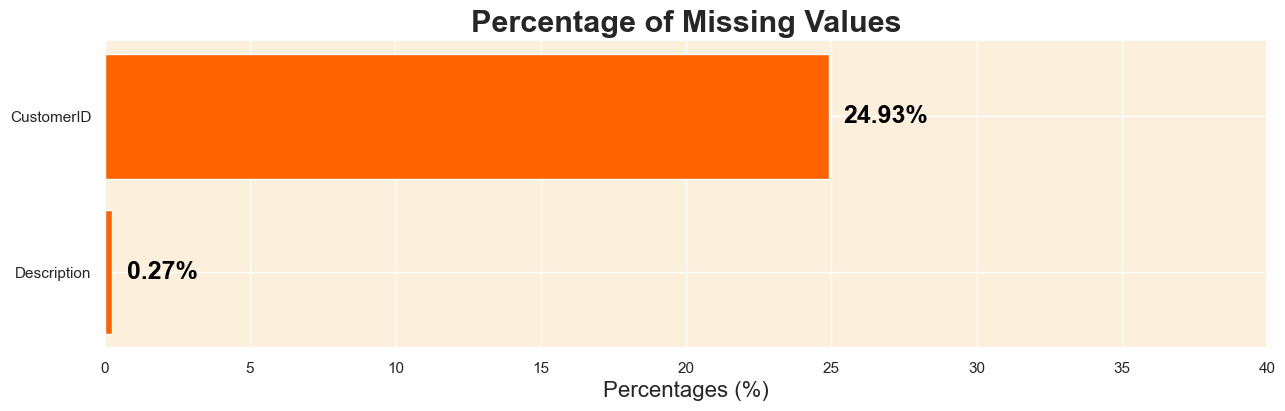

In [17]:
# Calculating the percentage of missing values for each column
missing_data = retail_data.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / retail_data.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

Analysis: 

* CustomerID<br>

Now, as from the above calculation, we can see that almost 25% of total customerIds are missing from the dataset. There are a number of ways by using which we can deal with the null values. One way is to
* 
simply get rid of the a* a
another way could be imputation through mean and medianlue  ue
we can also come up with some predictive values for the feature by using simple linear re 
   ion
But talking about our case I don't think that the 2nd andoptionsption will be of any use as here we need the exact customerId for the invoice, there is no way we can impute or predict the customerMoreover, since the clustering is based on customer behavior and preferences, it's crucial to have accurate data on customer identifiers. Therefore, removing the rows with missing CustomerIDs seems to be the most reasonable approach to maintain the integrity of the clusters and the analysis.

* Description <br>

* The Description column has a minor percentage of missing values. However, it has been noticed that there are inconsistencies in the data where the same StockCode does not always have the same Description. This indicates data quality issues and potential errors in the product descriptions.
* 
Given these inconsistencies, imputing the missing descriptions based on StockCode might not be reliable. Moreover, since the missing percentage is quite low, it would be prudent to remove the rows with missing Descriptions to avoid propagating errors and inconsistencies into the subsequent analyses.

ngly.

In [19]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns

retail_data = retail_data.dropna(subset=['CustomerID', 'Description'])

In [20]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


We have successfully dropped the null values.

### Handling Duplicate values

In [23]:
# Printing out the duplicate rows

duplicate_rows = retail_data[retail_data.duplicated(keep = False)]

# sorting the duplicate value from the feature so that we can have a better look at them

duplicate_rows_sorted = duplicate_rows.sort_values(by= ['InvoiceNo','StockCode','Description','CustomerID','Quantity'])

# displaying the 1st 10 records

duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom


Handling Duplicate Value Strategy:

In the context of this project, the presence of completely identical rows, including identical transaction times, suggests that these might be data recording errors rather than genuine repeated transactions. Keeping these duplicate rows can introduce noise and potential inaccuracies in the clustering and recommendation system.Therefore, removing the data from the dataset is the must.

In [25]:
## Counting the duplicate values

count_of_duplicate_values = retail_data.duplicated().sum()
print("The duplicate data in the column are", count_of_duplicate_values)#using string interpolation 

## Removing the duplicate value

retail_data.drop_duplicates(inplace = True) # with inplace the drop operation is basically permanent in the dataset

The duplicate data in the column are 5225


In [26]:
retail_data.duplicated().sum() #No duplicate value remaining

0

### Dealing with the canceled values 

To refine our understanding of customer behavior and preferences, we need to take into account the transactions that were canceled. Initially, we will identify these transactions by filtering the rows where the InvoiceNo starts with "C".Subsequently, we will analyze these rows to understand their common characteristics or patterns.

In [28]:
#Writing a code to find out the transaction whose InvoiceNo has c in the beginning and
#dividing it as canceled or completed 

retail_data['Transaction_Status']= np.where(retail_data['InvoiceNo'].astype(str).str.startswith('C'),'Cancelled','Completed')



In [29]:
# extracting the rows with only cancelled status

cancelled_status = retail_data.where(retail_data['Transaction_Status'] == 'Cancelled')

cancelled_status.describe()

,Quantity,UnitPrice,CustomerID
count,8872.000000,8872.000000,8872.000000
mean,-30.774910,18.899512,14990.152953
std,1172.249902,445.190864,1708.230387
min,-80995.000000,0.010000,12346.000000
25%,-6.000000,1.450000,13505.000000
50%,-2.000000,2.950000,14868.000000
75%,-1.000000,4.950000,16393.000000
max,-1.000000,38970.000000,18282.000000


In [30]:
#Finding the % of total canceled products

total_cancelled_productperc = (retail_data['Transaction_Status'].where(retail_data['Transaction_Status'] == 'Cancelled').count()/retail_data.shape[0])*100
total_cancelled_productperc


2.209141343213713

<span style="color:orange;"><b>Inferences from the Cancelled Transactions Data</b></span>

* More than 2% of total products has been cancelled, which might not seem too much but 2% of the cancellation rate also can impact the overall retail health.

* All quantities in the cancelled transactios are negative, which tells us that these are the orders that has been surely canceled.

* The Unitprice column has a considerable spread(meaning the value goes from minimum 0.01$ to 38970$), which says the cancellation has been made for both low and high-value products.(I can't say totally, there is also a possibility that there might be cancellation for a product in huge number of quantity).

<span style="color:orange;"><b>Handling the Cancelled Transactions Data</b></span>

Considering the project's objective to cluster customers based on their purchasing behaviour and preferences and to create a recommendation system, it's important to understand the pattern of cancellations by the customers. From which 
* we can dig down some underlying customer behaviour like what group of customers are likely to cancel which products, which are the most cancelled products. We can also design our recommendation system in such a way that it will have least to no possibility of suggesting the cancelled product to the consumers, which can significantly improve the cancellation rate.


In [33]:
### Correcting StockCode Anomalies 

# Finding out the unique stock code
unique_stock_code = retail_data['StockCode'].nunique()
print("The total number of unique stocks code in the dataset is:", unique_stock_code)

The total number of unique stocks code in the dataset is: 3684


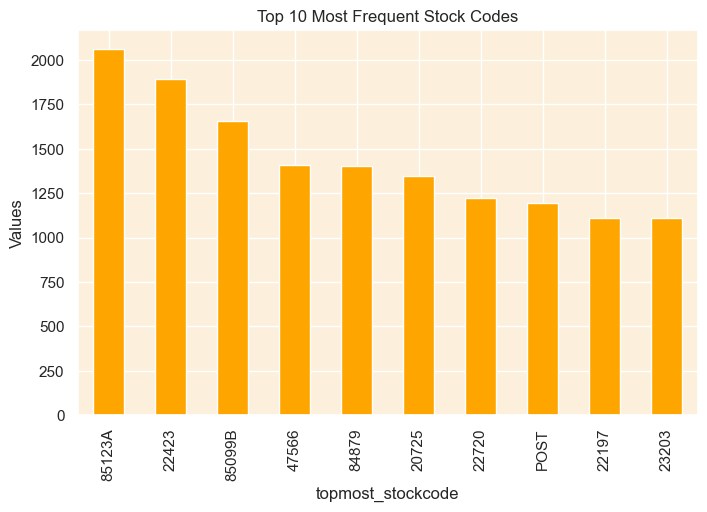

In [34]:
# Finding the topmost stockcode(let's say top 10) 

topmost_stockcode = retail_data['StockCode'].value_counts(ascending = False).head(10)


## Trying to plot in a barchart

plt.figure(figsize= (8,5))
topmost_stockcode.plot(kind = 'bar',color = '#ffA500')

#Adding the percentage frequency on the bars
#for index, value in enumerate (topmost_stockcode):
 #   plt.text(value,index+0.25,f'{value:.2f}%',fontsize = 10)
    

plt.title('Top 10 Most Frequent Stock Codes')
plt.ylabel('Values')
plt.xlabel('topmost_stockcode')

plt.show()

In [35]:
retail_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Transaction_Status'],
      dtype='object')

<span style="color:orange;"><b>Inferences on stock codes: </b></span>

* The dataset contains 3684 unique stock codes, indicating a substantial variety of products available in the store. We can cluster consumers on the basis of the type of the product they buy.

* We also see that the top 10 stockCode are the code whose products are liked the most or purchased the most.

* <b> Stock Code Anomalies </b> : We observe that while most stock codes are composed of 5 or 6 charecter and following the similar pattern but the stockCode "POST" seems a bit problematic. A random assumption could be instead of being a product it could be some kind of service or non-product transactions(perhaps the postage fees). In order to correctly cluster data it's very important for us to point out these anomolies and handle them properly.

To delve deeper into identifying these anomalies, let's explore the frequency of the number of numeric characters in the stock codes, which can provide insights into the nature of these unusual entries:

In [38]:
#finding the number of numeric characters in each unique stock code

unique_stock_codes = retail_data['StockCode'].unique()

numeric_char_count_in_unique_code =  pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

print(numeric_char_count_in_unique_code)

5    3676
0       7
1       1
Name: count, dtype: int64


Inference:

The output indicates the following:

* A majority of the unique stock codes(3676 out of 3684) contains exactly 5 numeric charecters, which seems to be the standard format of the stockcode.

* Their are few anomalies: 7 of the stockcode has no numeric charecter and 1 stock code has 1 numeric character. These are clearly deviating from the standard format. Now we need to understand the format of the anamolous stock codes.

In [40]:
# Finding and printing the stock codes with 0 and 1 numeric characters

anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0,1)]

#printing each stock code

for code in anomalous_stock_codes:
    print(code)

POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


From above we can see that these seven products stock codes are totally different and they actually doesn't seem like product codes rather they seem like some jitterish representation or codes for some other services maybe provided by the retail. 

We can say that these seven values are kind of outliers and they might create noise and inconsistencies if we use them while creating a recommendation model because here our focus remains on recommenting strictly relevent and genuine product to the consumers. 

In next step we will try to remove these unnecessary value from data.

In [42]:
# Here, we will try to remove the rows that have these anomalous contents

filtered_retail_data = retail_data[~retail_data['StockCode'].isin(anomalous_stock_codes)]

In [43]:
filtered_retail_data


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Completed
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed


In [44]:
#checking the unique value of stockcode from new dataframe

unique_stock_codes1 = filtered_retail_data['StockCode'].unique()

numeric_char_count_in_unique_code1 =  pd.Series(unique_stock_codes1).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

print(numeric_char_count_in_unique_code1)

5    3676
Name: count, dtype: int64


In [45]:
filtered_retail_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Transaction_Status'],
      dtype='object')

We have successfully removed the anamolous code.

Working on description

The product description is the object type column in our dataset. This column might help us find some patterns in users' preferences for particular product. Let's try to look into what we can decode.

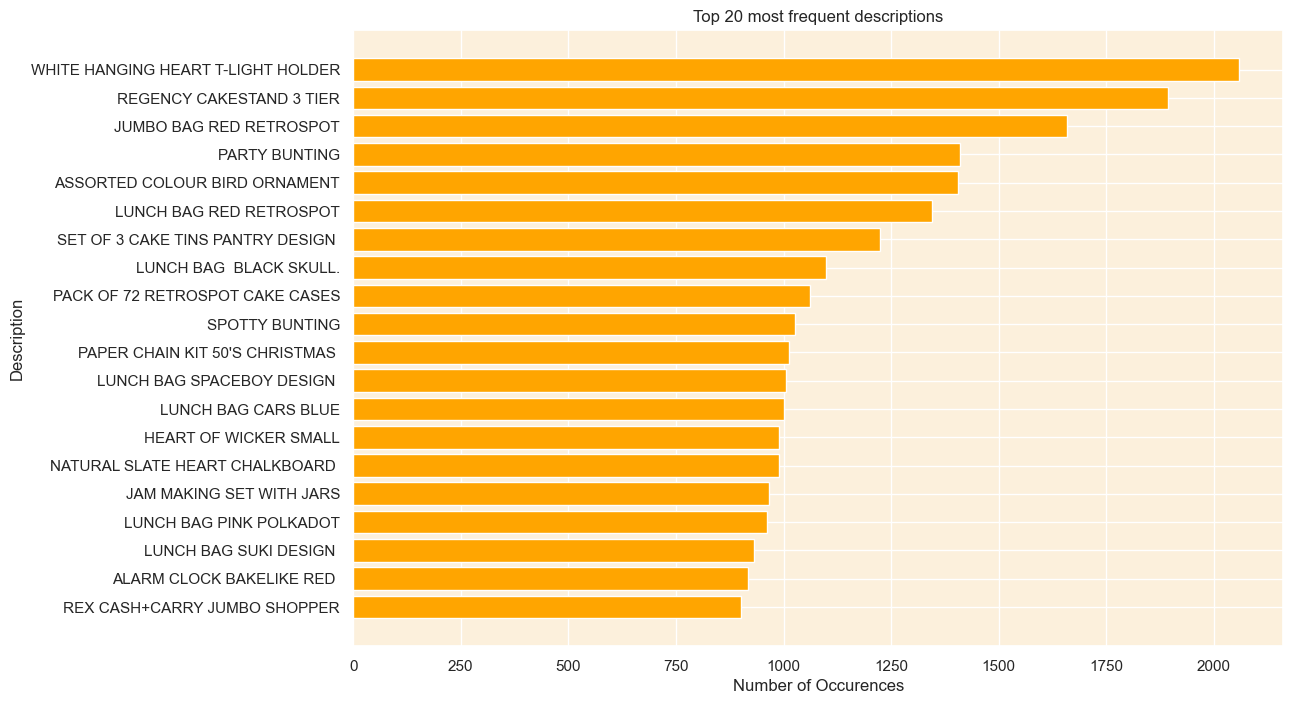

In [48]:
# Finding out the top 20 most frequently bought product sorting them in ascending order

famous_products = filtered_retail_data['Description'].value_counts()

#getting top 20 values

top_20_products = famous_products[:20]

# we can now plot those values

plt.figure(figsize= (12,8))

plt.barh(top_20_products.index[::-1],top_20_products.values[::-1],color = '#ffA500')

#Adding lables and title\

plt.xlabel('Number of Occurences')
plt.ylabel('Description')
plt.title('Top 20 most frequent descriptions')

plt.show()
           

* From the above observation, we can see that the most frequent descriptions are households items, items necessary for parties and decoration(home decor),lunch boxes, and kitchen wares.

* Another possibility could be that the data seemed to be most inclined towards the festive time where people are purchasing thing mostly related to decors, christmas ,household. So, we can say that the dataset is kind of festival biased.

* Another interesting thing is if you notice you can see that all the top 20 descriptions are written in uppercase ... it will be worth a while to see what format the other remaining descriptions also follow.
  

Next, I also want to see the % of the top 20 descriptions with respect to the total available descriptions. 



In [50]:
filtered_retail_data.isnull().sum()

InvoiceNo             0
StockCode             0
Description           0
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID            0
Country               0
Transaction_Status    0
dtype: int64

In [51]:
# Calculating the % of the top 20 products

number_of_top_20_products =round((top_20_products.sum()/ filtered_retail_data['Description'].notnull().sum())*100)
# using f string within print statement
print(f"Top 20 product constitute {number_of_top_20_products} % of total description in our dataset")




Top 20 product constitute 6 % of total description in our dataset


In [52]:
# Now we will also look into unique descriptions containing lowercase characters 

unique_descriptions = filtered_retail_data['Description'].unique()

# in our unique description we will try to find the lowercase data

lowercase_descriptions = [d for d in unique_descriptions if any(char.islower() for char in d)]

print('The unique descriptions containing lowercase charecters')

for c in lowercase_descriptions:
    print(c)



The unique descriptions containing lowercase charecters
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


From the above observation, we can see that some product descriptions like "Next Day Carriage" and "High-Resolution Image" don't really make any sense.Next task of mine will be to remove these jitterish description and also standarize all the description by changing into the uppercase status

In [54]:
# Counting the number of rows which contain "Next Day Carriage" and "High-Resolution Image"

counting_rows = filtered_retail_data['Description'].isin(['Next Day Carriage','High-Resolution Image']).sum()
print(f" There are {counting_rows} descriptions with jitterish value")



 There are 80 descriptions with jitterish value


In [55]:
# Deleting all the rows with the jitters value
filtered_retail_data = filtered_retail_data[~filtered_retail_data['Description'].isin(['Next Day Carriage','High-Resolution Image'])]




In [56]:
filtered_retail_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Completed
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed


In [57]:
counting_rows = filtered_retail_data['Description'].isin(['Next Day Carriage','High-Resolution Image']).sum()
print(f" There are {counting_rows} descriptions with jitterish value")


 There are 0 descriptions with jitterish value


In [58]:
filtered_retail_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Completed
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed


We have successfully removed the jitterish value.

In [60]:
filtered_retail_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Transaction_Status'],
      dtype='object')

In [61]:
#changing everything in the description in uppercase

filtered_retail_data['Description'] = filtered_retail_data['Description'].str.upper()

In [62]:
filtered_retail_data['Description'].where(filtered_retail_data['Description'].str.islower()).count()

0

So we can see that all the string in the description has changed into lowercase.

<b> Handling unit prices that have zero prices </b>

In [65]:
#let's see how many value in unitprice are of 0

unit_price_0= filtered_retail_data.loc[filtered_retail_data['UnitPrice'] == 0, ['UnitPrice', 'Transaction_Status','Quantity','Description']]

unit_price_0

,UnitPrice,Transaction_Status,Quantity,Description
9302,0.0,Completed,1,ROUND CAKE TIN VINTAGE GREEN
33576,0.0,Completed,4,ADVENT CALENDAR GINGHAM SACK
40089,0.0,Completed,10,REGENCY CAKESTAND 3 TIER
47068,0.0,Completed,24,PAPER BUNTING RETROSPOT
47070,0.0,Completed,24,PLASTERS IN TIN SKULLS
56674,0.0,Completed,1,ORGANISER WOOD ANTIQUE WHITE
86789,0.0,Completed,16,FAIRY CAKES NOTEBOOK A6 SIZE
130188,0.0,Completed,36,CERAMIC BOWL WITH LOVE HEART DESIGN
139453,0.0,Completed,5,MINI CAKE STAND HANGING STRAWBERY
145208,0.0,Completed,2,HEART GARLAND RUSTIC PADDED


In [66]:
unit_price_0['Quantity'].describe()

count       33.000000
mean       420.515152
std       2176.713608
min          1.000000
25%          2.000000
50%         11.000000
75%         36.000000
max      12540.000000
Name: Quantity, dtype: float64

Inference:

* There were only 33 transactions with unit price 0. And those transactions were all completed. Which means that none of them were canceled transactions.

* All the products with 0 unit price looks like decent nonsensical products

* These transactions have a high variability in the quantity of items involved, ranging from 1 to 12,540. With a high standard deviation.

* Including these transactions in the cluster analysis might introduce noise and might deviate from the behavioral analysis.


<b> Strategy to handle the data:</b>
There are only 33 rows with 0 unit prices, so it won't create a big problem if we just drop the values.

In [68]:
# Removing the 0 valued unit price

filtered_retail_data = filtered_retail_data[filtered_retail_data['UnitPrice']> 0]

In [69]:
filtered_retail_data['UnitPrice'].where(filtered_retail_data['UnitPrice'].isin([0])).count()

0

Successfully removed the 0 unit price.

## Feature Engineering 

Feature engineering is the process of transforming raw data into meaningful and useful features that can be used by machine learning algorithms to improve the model's predictive performance. It involves creating, modifying, or selecting input variables (features) that enhance the algorithm's ability to understand patterns in the data.

For a better customer profiling we will be engineering some features.

<b> RMF Features </b>

RFM features are used in customer segmentation and stand for:

Recency:

How recently a customer made a purchase or interacted with the business.
Example: Days since the last purchase.
Frequency:

How often a customer makes purchases within a given time period.
Example: Number of purchases in the past year.
Monetary:

How much money a customer spends during their interactions.
Example: Total revenue generated by the customer.

#### Use of RFM Features:
Helps identify valuable customers for targeted marketing.
Commonly used in customer lifetime value (CLV) analysis and retention strategies.


### Recency
Days since the last purchase by the customers

Step behind extracting recency
- Use invoice date
- Choose the latest date in the invoice date and then subtract all other date with the maximum purchase date
- That is the recent date

In [75]:
filtered_retail_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Transaction_Status'],
      dtype='object')

In [76]:
filtered_retail_data['InvoiceDate'].dtype

dtype('O')

In [77]:
filtered_retail_data['InvoiceDate'] = pd.to_datetime(filtered_retail_data['InvoiceDate'])

In [78]:
filtered_retail_data['InvoiceDate'].dtype

dtype('<M8[ns]')

In [79]:
# Changing the datetime format of invoice date into datetime and then extracting only the date part we can only extract date part

filtered_retail_data['new_date'] = filtered_retail_data['InvoiceDate'].dt.date

# Getting the maximum date from a column

maximum_date_from_new_date = filtered_retail_data['new_date'].max()

#Finding the most recent purchase date for each customer

customer_data = filtered_retail_data.groupby('CustomerID')['new_date'].max().reset_index()

#changing the date type to date time

customer_data['new_date'] = pd.to_datetime(customer_data['new_date'])

maximum_date_from_new_date = pd.to_datetime(maximum_date_from_new_date)

#Getting the difference between two values

customer_data['Last_purchases_date'] = (maximum_date_from_new_date - customer_data['new_date']).dt.days






# Calculating the frequency

Here we will simply count how many times the particular customer purchased from the store. For that, we can count the unique number of the transaction made. For that, we can count the customer and we will get the value.

In [81]:
temp_df1 = filtered_retail_data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

#Let's try to rename InvoiceNo column in tempdf1 into total_purchased

temp_df1.rename(columns= {'InvoiceNo':'Total_Transactions'}, inplace = True)

#Meging the temp_df with the customer data on customerID

customer_data = pd.merge(customer_data,temp_df1,on = 'CustomerID',how = 'inner')

In [82]:
## Rough query
temp_df = filtered_retail_data.groupby('CustomerID').size().reset_index(name = 'purchaseFrequency')

#Meging the temp_df with the customer data on customerID

customer_data = pd.merge(customer_data,temp_df,on = 'CustomerID',how = 'inner')


In [83]:
customer_data = customer_data.drop(['purchaseFrequency','new_date'],axis = 1)

In [84]:
customer_data

,CustomerID,Last_purchases_date,Total_Transactions
0,12346.0,325,2
1,12347.0,2,7
2,12348.0,75,4
3,12349.0,18,1
4,12350.0,310,1
...,...,...,...
4357,18280.0,277,1
4358,18281.0,180,1
4359,18282.0,7,3
4360,18283.0,3,16


### Monetary Value

Here we will be using simply unitprice and quantity to calcuate the monetary value

In [86]:
# Calculating the total spend

filtered_retail_data['total_spend'] = filtered_retail_data['UnitPrice'] * filtered_retail_data['Quantity']

# Finding the total_spend amount by each of the customers

total_spend = filtered_retail_data.groupby('CustomerID')['total_spend'].sum().reset_index()

# Merging the data with the customer_data

customer_data = pd.merge(customer_data,total_spend,on = 'CustomerID',how = 'left')


In [87]:
customer_data

,CustomerID,Last_purchases_date,Total_Transactions,total_spend
0,12346.0,325,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1437.24
3,12349.0,18,1,1457.55
4,12350.0,310,1,294.40
...,...,...,...,...
4357,18280.0,277,1,180.60
4358,18281.0,180,1,80.82
4359,18282.0,7,3,176.60
4360,18283.0,3,16,2039.58


# Let's perform some behavioural Analysis of the customer

Behavioural analysis is a very important part in any customer analysis project. It helps you to better understand the customers, their preferences(individual and group),buying behaviours, so on and so fourth. While understanding our consumers we will basically:

* How many unique products are purchased by the consumers ?(This helps us to better understand the buying taste of the consumer. A higher value indicates that the consumer has a diverse taste and lower value means that the users have a lower value). This can further help us segment the users in the basis of their buying diversity also.

* What is the average days between purchase of the consumers?? What is the favourite shopping day? what is the most likely time for the user to shop(Representing the busiest time)??

These features can futher help us robust our customer sengmentation and also our recommendation engine.

In [89]:
# purchasing diversity of the customer we will find it on the basis of the stock code

filtered_data2 = filtered_retail_data.groupby('CustomerID')['StockCode'].nunique().reset_index()

# Renaming StockCode into diverse_product_number

filtered_data2.rename(columns = {'StockCode':'diverse_product_number'},inplace = True)

# Now merging the data into the customer data

customer_data = pd.merge(customer_data,filtered_data2,on = 'CustomerID',how = 'left')


In [90]:
customer_data

,CustomerID,Last_purchases_date,Total_Transactions,total_spend,diverse_product_number
0,12346.0,325,2,0.00,1
1,12347.0,2,7,4310.00,103
2,12348.0,75,4,1437.24,21
3,12349.0,18,1,1457.55,72
4,12350.0,310,1,294.40,16
...,...,...,...,...,...
4357,18280.0,277,1,180.60,10
4358,18281.0,180,1,80.82,7
4359,18282.0,7,3,176.60,12
4360,18283.0,3,16,2039.58,262


In [91]:
filtered_retail_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Transaction_Status', 'new_date',
       'total_spend'],
      dtype='object')

In [92]:
# Extract day of week and hour from InvoiceDate

filtered_retail_data['Day_of_week'] = filtered_retail_data['InvoiceDate'].dt.dayofweek
filtered_retail_data['Hour'] = filtered_retail_data['InvoiceDate'].dt.hour

# calculate the average number of days between consecutive purchases

days_between_purchases = filtered_retail_data.groupby('CustomerID')['new_date'].apply(lambda x:(x.diff().dropna()).apply(lambda y:y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()

#Renaming the columns

average_days_between_purchases.rename(columns = {'new_date':'Average_Days_Between_Purchases'},inplace = True)

# Finding the favorite shopping day of the week

favourite_shopping_day = filtered_retail_data.groupby(['CustomerID','Day_of_week']).size().reset_index(name = 'Count')

favourite_shopping_day = favourite_shopping_day.loc[favourite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID','Day_of_week']]

#Find the favorite shopping hour of the day

favourite_shopping_hour = filtered_retail_data.groupby(['CustomerID','Hour']).size().reset_index(name= 'Count')
favourite_shopping_hour = favourite_shopping_hour.loc[favourite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID','Hour']]

# Merge the new features into the customer_data dataframe

customer_data = pd.merge(customer_data,average_days_between_purchases,on = 'CustomerID')
customer_data = pd.merge(customer_data,favourite_shopping_day,on = 'CustomerID')
customer_data = pd.merge(customer_data,favourite_shopping_hour,on = 'CustomerID')


In [93]:
customer_data

,CustomerID,Last_purchases_date,Total_Transactions,total_spend,diverse_product_number,Average_Days_Between_Purchases,Day_of_week,Hour
0,12346.0,325,2,0.00,1,0.000000,1,10
1,12347.0,2,7,4310.00,103,2.016575,1,14
2,12348.0,75,4,1437.24,21,10.884615,3,19
3,12349.0,18,1,1457.55,72,0.000000,0,9
4,12350.0,310,1,294.40,16,0.000000,2,16
...,...,...,...,...,...,...,...,...
4277,18280.0,277,1,180.60,10,0.000000,0,9
4278,18281.0,180,1,80.82,7,0.000000,6,10
4279,18282.0,7,3,176.60,12,9.916667,4,13
4280,18283.0,3,16,2039.58,262,0.465181,3,14


Furthermore, I also want to dig down into the number of cancellations made by the customers. Through this we can group customers on the basis of the cancellation they make.

In [95]:
filtered_retail_data['Transaction_Status'].unique()

array(['Completed', 'Cancelled'], dtype=object)

In [96]:
#Total canceled products in our dataset

cancelled_products = filtered_retail_data[filtered_retail_data['Transaction_Status'] == 'Cancelled']

In [97]:
cancelled_products

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,new_date,total_spend,Day_of_week,Hour
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Cancelled,2010-12-01,-4.65,2,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Cancelled,2010-12-01,-19.80,2,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Cancelled,2010-12-01,-6.96,2,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Cancelled,2010-12-01,-6.96,2,10
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Cancelled,2010-12-01,-6.96,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom,Cancelled,2011-12-09,-23.40,4,9
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,Cancelled,2011-12-09,-9.13,4,9
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,Cancelled,2011-12-09,-54.75,4,11
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,Cancelled,2011-12-09,-1.25,4,11


In [98]:
cancelled_stock_counts = cancelled_products.groupby('CustomerID')['StockCode'].count().reset_index()

In [99]:
#Renaming the stockcode part

cancelled_stock_counts.rename(columns= {'StockCode':'Cancelled_products'},inplace= True)

In [100]:
# Merging the cancelled_stock_Counts with customer_data

customer_data = pd.merge(customer_data,cancelled_stock_counts,on ='CustomerID',how = 'left')

In [101]:
customer_data

,CustomerID,Last_purchases_date,Total_Transactions,total_spend,diverse_product_number,Average_Days_Between_Purchases,Day_of_week,Hour,Cancelled_products
0,12346.0,325,2,0.00,1,0.000000,1,10,1.0
1,12347.0,2,7,4310.00,103,2.016575,1,14,NaN
2,12348.0,75,4,1437.24,21,10.884615,3,19,NaN
3,12349.0,18,1,1457.55,72,0.000000,0,9,NaN
4,12350.0,310,1,294.40,16,0.000000,2,16,NaN
...,...,...,...,...,...,...,...,...,...
4277,18280.0,277,1,180.60,10,0.000000,0,9,NaN
4278,18281.0,180,1,80.82,7,0.000000,6,10,NaN
4279,18282.0,7,3,176.60,12,9.916667,4,13,1.0
4280,18283.0,3,16,2039.58,262,0.465181,3,14,NaN


Here, we see a lot of NAN values in the cancelled_products column beacause of the left join that we just did. We cannot proceed forward with NAN values for obvious reasons. So we need to replace the NAN values with 0 for now, which seems like a better option.


In [103]:
customer_data.columns

Index(['CustomerID', 'Last_purchases_date', 'Total_Transactions',
       'total_spend', 'diverse_product_number',
       'Average_Days_Between_Purchases', 'Day_of_week', 'Hour',
       'Cancelled_products'],
      dtype='object')

In [104]:
# Replacing the NAN values with 0

customer_data['Cancelled_products'] = customer_data['Cancelled_products'].fillna(0)

In [105]:
customer_data

,CustomerID,Last_purchases_date,Total_Transactions,total_spend,diverse_product_number,Average_Days_Between_Purchases,Day_of_week,Hour,Cancelled_products
0,12346.0,325,2,0.00,1,0.000000,1,10,1.0
1,12347.0,2,7,4310.00,103,2.016575,1,14,0.0
2,12348.0,75,4,1437.24,21,10.884615,3,19,0.0
3,12349.0,18,1,1457.55,72,0.000000,0,9,0.0
4,12350.0,310,1,294.40,16,0.000000,2,16,0.0
...,...,...,...,...,...,...,...,...,...
4277,18280.0,277,1,180.60,10,0.000000,0,9,0.0
4278,18281.0,180,1,80.82,7,0.000000,6,10,0.0
4279,18282.0,7,3,176.60,12,9.916667,4,13,1.0
4280,18283.0,3,16,2039.58,262,0.465181,3,14,0.0


We have sucessfully changed the NAN value to 0.

# Region based analysis

The dataset that we are working on consists of sales data from 37 different countries, it would be really interesting to analyze the region or country specific buying patterns and preferences. Different regions people might have varying preferences and purchasing behaviours which can be critical in personalizing marketing strategies and inventory planning. Over and above that , it can be significant in logistics and supply chain optimization, particularly for online retailer where shipping and delivery play a significant role.

In [108]:
filtered_retail_data['Country'].value_counts(normalize = True).head()

Country
United Kingdom    0.890969
Germany           0.022724
France            0.020402
EIRE              0.018440
Spain             0.006162
Name: proportion, dtype: float64

### Inference

Given, that a substantial proportion - 89% of transaction are taking place from United kingdom, we can create a binning where united kingdom will represent itself solo and then all other country will represent themselves as one. This approach  can potentially streamline the clustering process without losing critical geographical infomation,especially when considering the application of algorithm like K-means which are sensetive to the dimensinality of the feature space.



In [110]:
# 

filtered_retail_data['is_uk'] = np.where(filtered_retail_data['Country'] == 'United Kingdom',1,0)

In [111]:
customer_data

,CustomerID,Last_purchases_date,Total_Transactions,total_spend,diverse_product_number,Average_Days_Between_Purchases,Day_of_week,Hour,Cancelled_products
0,12346.0,325,2,0.00,1,0.000000,1,10,1.0
1,12347.0,2,7,4310.00,103,2.016575,1,14,0.0
2,12348.0,75,4,1437.24,21,10.884615,3,19,0.0
3,12349.0,18,1,1457.55,72,0.000000,0,9,0.0
4,12350.0,310,1,294.40,16,0.000000,2,16,0.0
...,...,...,...,...,...,...,...,...,...
4277,18280.0,277,1,180.60,10,0.000000,0,9,0.0
4278,18281.0,180,1,80.82,7,0.000000,6,10,0.0
4279,18282.0,7,3,176.60,12,9.916667,4,13,1.0
4280,18283.0,3,16,2039.58,262,0.465181,3,14,0.0


In [112]:
temp_dataframe = filtered_retail_data[['CustomerID','is_uk']]

In [113]:
temp_dataframe

,CustomerID,is_uk
0,17850.0,1
1,17850.0,1
2,17850.0,1
3,17850.0,1
4,17850.0,1
...,...,...
541904,12680.0,0
541905,12680.0,0
541906,12680.0,0
541907,12680.0,0


In [114]:
temp_dataframe.drop_duplicates(subset=None, keep='first',inplace = True)

In [115]:
temp_dataframe.shape

(4362, 2)

In [116]:
customer_data.shape

(4282, 9)

In [117]:
# Merging the temp_dataframe with customer_data together

customer_data = pd.merge(customer_data,temp_dataframe,on ='CustomerID',how = 'left')

In [118]:
customer_data

,CustomerID,Last_purchases_date,Total_Transactions,total_spend,diverse_product_number,Average_Days_Between_Purchases,Day_of_week,Hour,Cancelled_products,is_uk
0,12346.0,325,2,0.00,1,0.000000,1,10,1.0,1
1,12347.0,2,7,4310.00,103,2.016575,1,14,0.0,0
2,12348.0,75,4,1437.24,21,10.884615,3,19,0.0,0
3,12349.0,18,1,1457.55,72,0.000000,0,9,0.0,0
4,12350.0,310,1,294.40,16,0.000000,2,16,0.0,0
...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,277,1,180.60,10,0.000000,0,9,0.0,1
4278,18281.0,180,1,80.82,7,0.000000,6,10,0.0,1
4279,18282.0,7,3,176.60,12,9.916667,4,13,1.0,1
4280,18283.0,3,16,2039.58,262,0.465181,3,14,0.0,1


### Drilling down seasonality and trends

This part is the part of the behavior analysis of the customer. It will add additional information on the buying behavior of the customers, it can again help in tailoring the marketing strategies and enhance customer satisfaction as a whole. As part of this analysis we will find out

* Mean of monthly spend: This is the average amount a customer spends monthly. It helps us gauge the general spending habits of each customer. A higher mean of a customer shows that they are the potential ones who might show interest in premium products, whereas a lower mean indicates customers are quite budget-conscious.

* Monthly Spending std: This feature indicates the variability in a customer's monthly spending. High variability means that customer spending fluctuates month-on-month, perhaps indicating sporadic large purchases. On the other hand, lower values suggest less variability.

* Spending trend: This reflects the trend in a customer's spending over time, calculated as the slope of the linear trend line fitted to their spending data. A positive value indicates an increasing trend in spending, possibly pointing to growing loyalty or satisfaction. And the vice versa.

In [120]:
filtered_retail_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Transaction_Status', 'new_date',
       'total_spend', 'Day_of_week', 'Hour', 'is_uk'],
      dtype='object')

In [121]:
#Extract month and year from data

filtered_retail_data['Year'] = filtered_retail_data['InvoiceDate'].dt.year
filtered_retail_data['Month'] = filtered_retail_data['InvoiceDate'].dt.month

#Calculte the monthly spending for each customer

monthly_spending = filtered_retail_data.groupby(['CustomerID','Year','Month'])['total_spend'].sum().reset_index()

#calculate seasonal buying patterns: we are using monthly frequency as a proxy for seasonal buying patterns

seasonal_buying_patterns = monthly_spending.groupby(['CustomerID'])['total_spend'].agg(['mean','std']).reset_index()

seasonal_buying_patterns.rename(columns = {'mean':'Monthly_spending_mean','std':'Monthly_spending_std'},inplace = True)

seasonal_buying_patterns['Monthly_spending_std'].fillna(0,inplace = True)


In [122]:
# calculating trends in spending

# we are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends

def calculate_trend(spend_data):
    if len(spend_data)>1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x,spend_data)
        return slope
    else:
        return 0

#Apply the calculate_trend function to find the spending trend for each customer

spending_trends = monthly_spending.groupby('CustomerID')['total_spend'].apply(calculate_trend).reset_index()

spending_trends.rename(columns = {'total_spend' : 'spending_trend'},inplace = True)


# Merging the new features into the customer_data dataframe

customer_data = pd.merge(customer_data,seasonal_buying_patterns,on ='CustomerID')

customer_data = pd.merge(customer_data,spending_trends,on = 'CustomerID')


#Display the first few rows of the customer_data dataframe

customer_data.head()




,CustomerID,Last_purchases_date,Total_Transactions,total_spend,diverse_product_number,Average_Days_Between_Purchases,Day_of_week,Hour,Cancelled_products,is_uk,Monthly_spending_mean,Monthly_spending_std,spending_trend
0,12346.0,325,2,0.00,1,0.000000,1,10,1.0,1,0.000000,0.000000,0.000000
1,12347.0,2,7,4310.00,103,2.016575,1,14,0.0,0,615.714286,341.070789,4.486071
2,12348.0,75,4,1437.24,21,10.884615,3,19,0.0,0,359.310000,203.875689,-100.884000
3,12349.0,18,1,1457.55,72,0.000000,0,9,0.0,0,1457.550000,0.000000,0.000000
4,12350.0,310,1,294.40,16,0.000000,2,16,0.0,0,294.400000,0.000000,0.000000


We have created a robust data set containing all the required information that we will be requiring while doing the customer segmentation.

In [124]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4282 non-null   float64
 1   Last_purchases_date             4282 non-null   int64  
 2   Total_Transactions              4282 non-null   int64  
 3   total_spend                     4282 non-null   float64
 4   diverse_product_number          4282 non-null   int64  
 5   Average_Days_Between_Purchases  4282 non-null   float64
 6   Day_of_week                     4282 non-null   int32  
 7   Hour                            4282 non-null   int32  
 8   Cancelled_products              4282 non-null   float64
 9   is_uk                           4282 non-null   int32  
 10  Monthly_spending_mean           4282 non-null   float64
 11  Monthly_spending_std            4282 non-null   float64
 12  spending_trend                  42

In [125]:
# changing the data type of the customerID to string as we don't want to do any mathematical operation on the customerID

customer_data['CustomerID'] = customer_data['CustomerID'].astype('string')

In [126]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4282 non-null   string 
 1   Last_purchases_date             4282 non-null   int64  
 2   Total_Transactions              4282 non-null   int64  
 3   total_spend                     4282 non-null   float64
 4   diverse_product_number          4282 non-null   int64  
 5   Average_Days_Between_Purchases  4282 non-null   float64
 6   Day_of_week                     4282 non-null   int32  
 7   Hour                            4282 non-null   int32  
 8   Cancelled_products              4282 non-null   float64
 9   is_uk                           4282 non-null   int32  
 10  Monthly_spending_mean           4282 non-null   float64
 11  Monthly_spending_std            4282 non-null   float64
 12  spending_trend                  42

Summarizing all the data types that we have in our new dataset

* CustomerID - It is simply the ID of all the unique users in our dataset. It is unique.
* Last purchase date: It is the recency, that says how many days ago a customer purchased from the store.
* Total transaction: It is the total number of transactions made by the customers
* Total spend: What is the total amount spent by the customers
* diverse product number: It counts alI the unique type of product brought by the customer
* Avergae_days_between_purchase : This column contains the average days between the purchase by each of the customer
* Day_of_week : This column contains the day of the week in which the particular buys the most number of product
* Hour: This column contains the hour in which the customer is likely to buy
* Cancelled_products: This column has the total number of the canceled product for the user
* is_uk: This column is a flag for either or not the customer is from UK or not. 1 says yes and 0 says no.
* Monthly_spending_mean:This column has the mean amount spent by the customer
* Monthly_spending_std: This column contains the mean of monthly spending std for each of the customers.
* Spending_trend : This column contains the spending trend either positive and negative for each of the customer
  

## Outlier Detection and Treatment

In this section, we will be identifying and handling outliers in a dataset. Outliers are data points that are significantly different from the majority of other points in the dataset. These points can potentially skew the results of our analysis,especially in k-means clustering where they can significantly influence the position of the cluster centeroids. Therefore, it is essential to identify and treat these outliers to achieve more accurate and meaningful clustering results.

Given the multi-dimensional nature of the data, it would be a smart to use algorithms that can detect outliers in multi-dimensional spaces. Here we will be using the isolation forest algorithm for this task. This algorithm works well for multi-dimensional data and is computationally efficient. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of a selected feature.


In [129]:
# Initializing the isolation model with a contamination parameter of 0.05

model = IsolationForest(contamination = 0.05,random_state = 0)

# Fitting the model on our dataset(converting DataFrame to Numpy to avoiwarning)

customer_data['Outlier_scores'] = model.fit_predict(customer_data.iloc[:,1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)

customer_data['is_outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_scores']]

# Display the first few rows of the customer_data dataframe

customer_data.head()

,CustomerID,Last_purchases_date,Total_Transactions,total_spend,diverse_product_number,Average_Days_Between_Purchases,Day_of_week,Hour,Cancelled_products,is_uk,Monthly_spending_mean,Monthly_spending_std,spending_trend,Outlier_scores,is_outlier
0,12346.0,325,2,0.00,1,0.000000,1,10,1.0,1,0.000000,0.000000,0.000000,1,0
1,12347.0,2,7,4310.00,103,2.016575,1,14,0.0,0,615.714286,341.070789,4.486071,1,0
2,12348.0,75,4,1437.24,21,10.884615,3,19,0.0,0,359.310000,203.875689,-100.884000,1,0
3,12349.0,18,1,1457.55,72,0.000000,0,9,0.0,0,1457.550000,0.000000,0.000000,1,0
4,12350.0,310,1,294.40,16,0.000000,2,16,0.0,0,294.400000,0.000000,0.000000,1,0


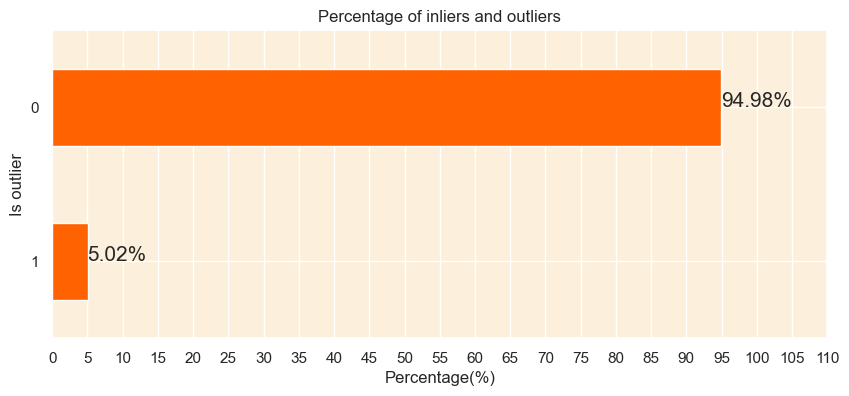

In [130]:
# calculate the percentage of inliers and outliers

outlier_percentage = customer_data['is_outlier'].value_counts(normalize= True) * 100

# Plotting the percentage of inliers and outliers

plt.figure(figsize = (10,4))
outlier_percentage.plot(kind ='barh',color = '#ff6200')

# Adding the labels on the bars
for index,value in enumerate(outlier_percentage):
    plt.text(value,index,f'{value:.2f}%',fontsize=15)

plt.title('Percentage of inliers and outliers')
plt.xticks(ticks = np.arange(0,115,5))
plt.xlabel('Percentage(%)')
plt.ylabel('Is outlier')
plt.gca().invert_yaxis()
plt.show()



### Inference

From the above plot, we can observe that about 5% of the customers have been identified as outliers in our dataset. This percentage seems to be a reasonable proportion, not too high to lose a significant amount of data, and not too low to retain potentially noisy data points. It suggests that our isolation forest algorithm has worked well in identifying a moderate percentage of outliers which will be critical in refining our customer segmentation.

### Strategy for handling the data

Considering the nature of the project(customer segmentation using clustering), it is crucial to handle these outliers to prevent them from affecting the cluster quality significantly. Therefore, I will separate these outliers for further analysis and remove them from our main dataset to prepare it for the clustering analysis.

Let's proceed with the following steps:
* Separate the identified outliers for further analysis and save them as a separate file
* Remove the outliers from the main dataset to prevent them from influencing the clustering process
* Drop the outlier_scores and is_outlier columns as they were auxiliary columns used for the outlier detection process
  

In [132]:
customer_data.head()

,CustomerID,Last_purchases_date,Total_Transactions,total_spend,diverse_product_number,Average_Days_Between_Purchases,Day_of_week,Hour,Cancelled_products,is_uk,Monthly_spending_mean,Monthly_spending_std,spending_trend,Outlier_scores,is_outlier
0,12346.0,325,2,0.00,1,0.000000,1,10,1.0,1,0.000000,0.000000,0.000000,1,0
1,12347.0,2,7,4310.00,103,2.016575,1,14,0.0,0,615.714286,341.070789,4.486071,1,0
2,12348.0,75,4,1437.24,21,10.884615,3,19,0.0,0,359.310000,203.875689,-100.884000,1,0
3,12349.0,18,1,1457.55,72,0.000000,0,9,0.0,0,1457.550000,0.000000,0.000000,1,0
4,12350.0,310,1,294.40,16,0.000000,2,16,0.0,0,294.400000,0.000000,0.000000,1,0


In [133]:
# To make the things easier I will simply use conditional formating to drop all the rows whose is_outlier is 1

customer_data = customer_data.drop(customer_data[customer_data['is_outlier'] == 1].index)




In [134]:
customer_data = customer_data.drop(['Outlier_scores','is_outlier'],axis = 1)

In [135]:
customer_data.shape

(4067, 13)

SO, We have altogether 4067 rows and 13 columns in our dataset.

### Correlation Analysis

The concept of colinearity is one of the most important topics that needs to be covered in any form of analysis that we do, but sadly it is not properly looked at. The presence of multicollinearity, where features are highly correlated, can potentially affect the clustering process by not allowing the model to learn the actual underlying patterns in the data, as the features do not provide unique information. This could lead to clusters that are not well separated and meaningful.

If we identify multicollinearity, we can utilize dimensionality reduction techniques like PCA. These techniques help in neutralizing the effect of multicollinearity by transforming the correlated features into a new set of uncorrelated variables, preserving most of the original data's variance. This step not only enhances the quality of clusters formed but also makes the clustering process more computationally efficient.


In [233]:
customer_data.columns

Index(['CustomerID', 'Last_purchases_date', 'Total_Transactions',
       'total_spend', 'diverse_product_number',
       'Average_Days_Between_Purchases', 'Day_of_week', 'Hour',
       'Cancelled_products', 'is_uk', 'Monthly_spending_mean',
       'Monthly_spending_std', 'spending_trend'],
      dtype='object')

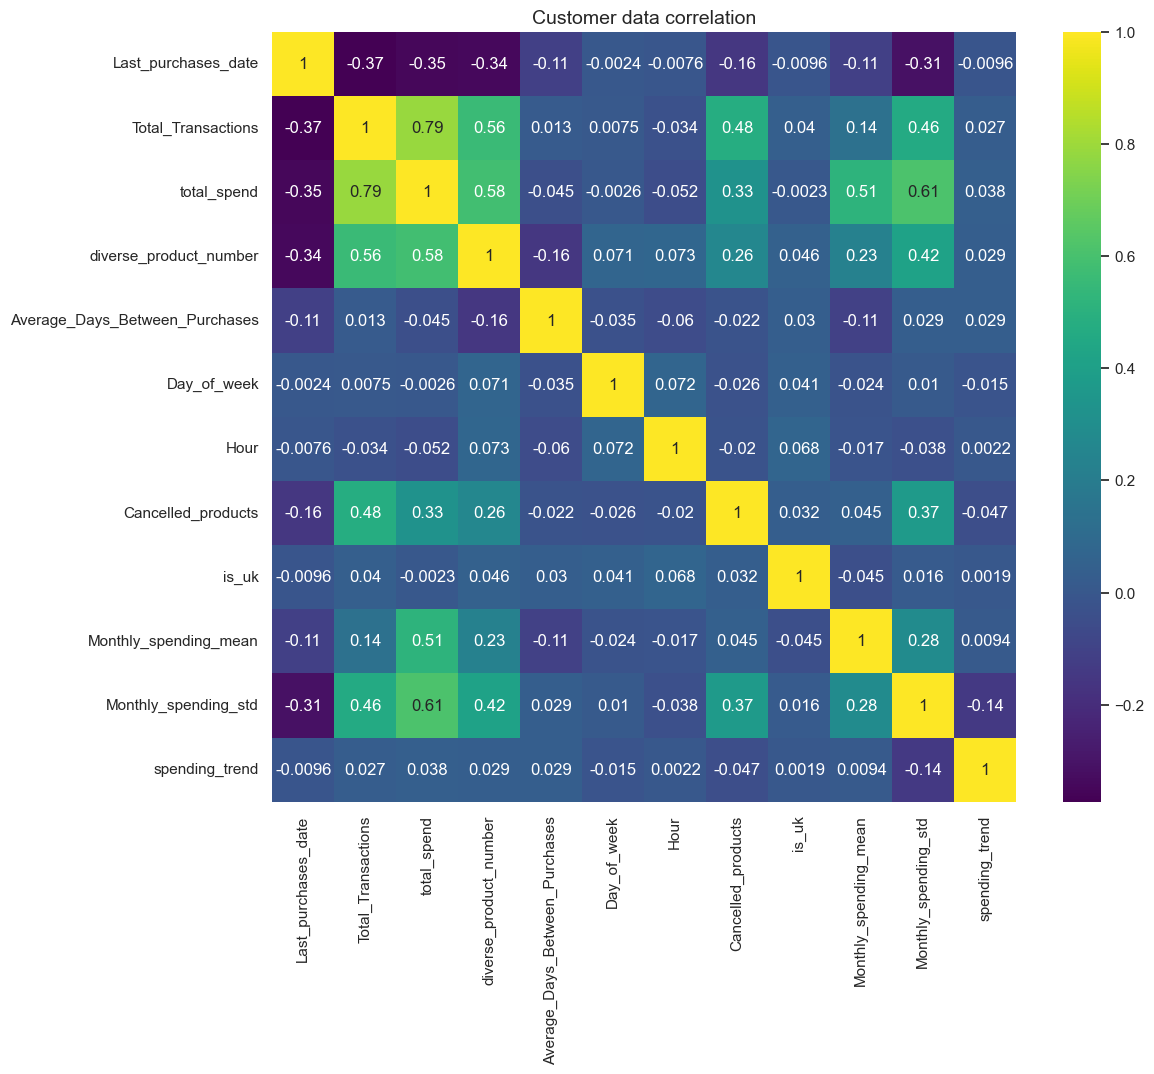

In [239]:
# creating a correlation map
#Reset background style
sns.set_style('whitegrid')

# we actually don't need customerID here so dropping the customerid to get the final correlation

final_corr = customer_data.drop(columns = ['CustomerID']).corr()

#plot the heatmap

plt.figure(figsize = (12,10))
sns.heatmap(final_corr,annot = True,cmap = 'viridis',cbar= True)
plt.title('Customer data correlation',fontsize = 14)
plt.show()



Inference:
So, after observing the colinearity among different features we have found some correlations among the features. such as:

Monthly_spending_std = total_spend - 0.61
Total_Spend = total_transaction - 0.79

The correlation ranges somewhere in between 6 - 8. Other than these 4 features we don't see much of the other features related to each other. This condition without doubt must be handled but I would like to skip it for now and proceed with the feature scaling and later on do the modifications if needed.

## Feature scaling
Feature scaling is one of the most crucial step that is to be followed before proceeding with any type of machine learning algorithm. As the name suggests this process is helpful in scaling down the feature(without losing its individuality) in such a way that they belong to a similar magnitude and will not create any biases during the model training process. 

The most famous feature scaling methods in ML are:

- Min-max scaler: scales down the feature value in between 0-1

Formula: 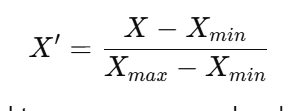
- Standard scalar: Scales down the value of the feature in such a way that the mean is 0 and standard deviation is maintained at 1. Uses z-score method:

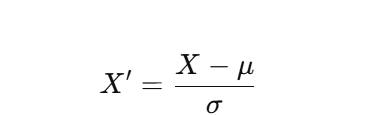

Here, In our problem we will be using standard scaler method for scaling our data poins. Before that we need to mind all the features in our customer data table doesnot require scaling. Thus I will not be scaling Customer_ID,'Is_uk','Day of the week'

In [254]:
customer_data.columns

Index(['CustomerID', 'Last_purchases_date', 'Total_Transactions',
       'total_spend', 'diverse_product_number',
       'Average_Days_Between_Purchases', 'Day_of_week', 'Hour',
       'Cancelled_products', 'is_uk', 'Monthly_spending_mean',
       'Monthly_spending_std', 'spending_trend'],
      dtype='object')

In [258]:
# Defining a scaler variable that calls standardScaler()function

scaler = StandardScaler()

# We need to exclude the columns from the table

Columns_to_scale = customer_data.columns.difference(['CustomerID', 'is_uk','Day_of_week'])

# keeping the old data safe from customer_data so using new variable 

customer_data_scaled = customer_data.copy()

# Now implementing the standard_scaler 

customer_data_scaled[Columns_to_scale] = scaler.fit_transform(customer_data_scaled[Columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()




,CustomerID,Last_purchases_date,Total_Transactions,total_spend,diverse_product_number,Average_Days_Between_Purchases,Day_of_week,Hour,Cancelled_products,is_uk,Monthly_spending_mean,Monthly_spending_std,spending_trend
0,12346.0,2.360555,-0.478363,-0.809385,-0.919982,-0.392037,1,-1.086998,-0.085923,1,-0.984945,-0.717867,0.085779
1,12347.0,-0.902350,0.671732,2.282567,0.826414,-0.145531,1,0.648018,-0.395444,0,0.687193,1.282298,0.112235
2,12348.0,-0.164914,-0.018325,0.221677,-0.577552,0.938500,3,2.816787,-0.395444,0,-0.009142,0.477735,-0.509159
3,12349.0,-0.740721,-0.708382,0.236248,0.295646,-0.392037,0,-1.520752,-0.395444,0,2.973423,-0.717867,0.085779
4,12350.0,2.209027,-0.708382,-0.598185,-0.663159,-0.392037,2,1.515526,-0.395444,0,-0.185422,-0.717867,0.085779


### Applying K Means Clustering

understanding k means clustering: 
K means clustering is an unsupervised machine learning algorithm used for partitioning a dataset into k-distinct groups(clusters) based on feature similarity. It is widely used in clustering problems to group data points that are more similar to each other than to the points to other group.

Step by step working of k-means clustering:
1. Choose the number of clusters(k= ?) - we will apply famous elbow method to find the optimal number of cluster for our dataset.
2. Initialize cluster center(This is also randomized)
3. Assign data points to the cluster and set up the centroids again
4. Repeat the process until the convergence of the centroids or the centroids could be changed no longer

Widely use Eucledian or Manhattan distance to calculate the distance between the data points.

The main advantage of such a clustering method is that
- It is very simple and efficient, and can be easily implemented with the large datasets

K-means clustering performance can be deviated specially when the dataset contains a lot of outliers.



### Implementing Elbow Method in k-means clustering

The elbow method is a heuristic technique used in k-means clustering to determine the optimal number of clusters(k). It works by analyzing the Within-Cluster sum of squares(WCSS) decreased as the number of cluster increases. It involves iterating through the data,generating clusters for various values of k. The k-means algorithm calculate the sum of square distances between each data point and it's assigned cluster centroid, and then assign a inertia score. By plotting the inertia scores against the k value, we create a graph that typically exhibits an elbow shape. The elbow point is the point where the value of this inertia score is the least. And we choose that as the number of cluster in our dataset.

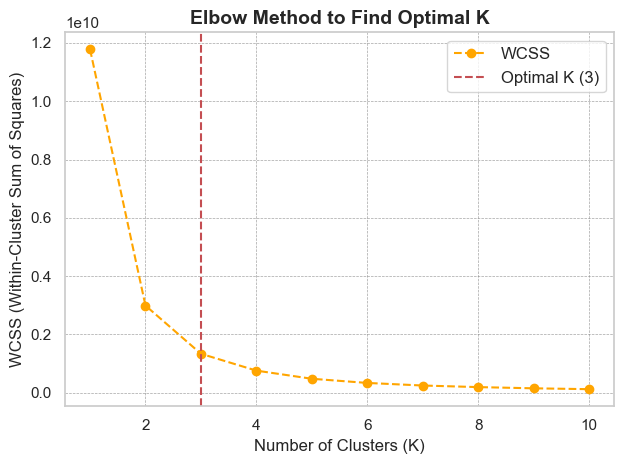

In [284]:

# Calculate WCSS for different K values
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11),wcss, marker='o', linestyle='--', color='#FFA500', label='WCSS')
plt.title('Elbow Method to Find Optimal K', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.axvline(x=3, linestyle='--', color='r', label='Optimal K (3)')
plt.legend(fontsize=12)
plt.tight_layout()


So we will take k = 3, because from the observation it looks like the most efficient one.

### K-Means Clustering

So now I will apply k-means clustering with the optimal cluster size 3. In case of K-means clustering it is super important to note that k-means algorithm might assign different labels to the clusters in each run. To address this, we can use the concept of label swapping which is crucial for obtaining label consistency accross different runs of the k-means algorithm, especially when the clusters are being interpreted for the real-world applications such as customer segmentation. 

In [434]:
#Apply KMEANS clustering using the optimal k

kmeans = KMeans(n_clusters = 3,init = 'k-means++',n_init = 10,max_iter= 100,random_state = 0)
kmeans.fit(customer_data_scaled)

#Get the frequency of each cluster

cluster_frequencies = Counter(kmeans.labels_)

#Create a mapping from old labels to new_labels based on frequency

label_mapping = {label:new_label for new_label,(label, _) in enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2,}.items()}  

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

#Append the new cluster labels to the original version of the dataset
customer_data['cluster'] = new_labels

#Append the new cluster labels to the scaled version of the dataset

customer_data_scaled['cluster'] = new_labels


In [416]:
customer_data['cluster'].unique()

array([4, 1, 3, 0, 2])


## Visualization and Evaluation of the clustering

This is the last part of the overall Machine learning project cycle where we try to visualize our result in a better way and evaluate the performance. I will be

- Using a pie chart to demonstrate the frequency of the points in each of the cluster
- Further, I will be evaluating the fitness of the model, unlike in supervised learning we don't have a straightforward approach to evaluating an unsupervised model but still we can use some internal and external evaluation technique to see how good the data points are clustered in the dataset.
I will use
- Silhouette Score: A measure to evaluate the separation distance between the clusters. Higher values indicate better cluster separation. It ranges from -1 to 1.
- Calinski Harabasz Score: This score is used to evaluate the dispersion between within clusters. A higher score indicates better-defined clusters.



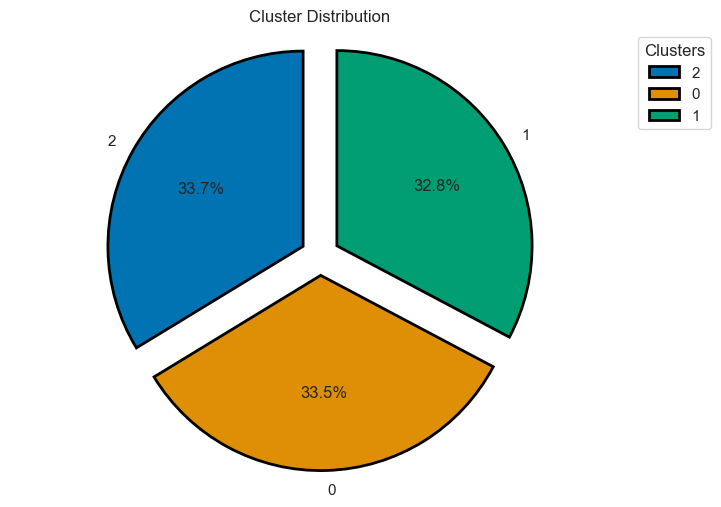

In [438]:
# Get the value counts of the 'cluster' column
cluster_counts = customer_data_scaled['cluster'].value_counts()

# Define a color palette for the pie chart
colors = sns.color_palette("colorblind", n_colors=3)  # 'Set2' is a nice palette for distinct values

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', colors=colors, 
        startangle=90, explode=(0.1, 0.1, 0.1), wedgeprops={'edgecolor': 'black', 'linewidth': 2})

# Customize the chart with title and legend
plt.title('Cluster Distribution')
plt.legend(cluster_counts.index, title="Clusters", loc='upper left', bbox_to_anchor=(1, 1))

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



According to the above piechart, the distribution of the data points in each of the clusters is almost similar with 33.7% in cluster 2, 32.5% in cluster 0 and 32.8% in cluster 1.

In [424]:
customer_data['cluster'].value_counts(normalize = True)

cluster
3    0.203590
1    0.203344
0    0.202852
4    0.195722
2    0.194492
Name: proportion, dtype: float64

### Implementation of Evaluation Metrics




In [426]:
#Calculating the number of observation in customer_data
observations = len(customer_data_scaled)
# seperate x which has all the features except for the cluster

X = customer_data_scaled.drop(columns = ['cluster'])

# y has cluster feature
y = customer_data_scaled['cluster']
y_= customer_data_scaled['cluster'].astype('str')

# compute the metrics

silhoutte = silhouette_score(X,y)

#score = calinski_harabasz_score(X, y_)

# Print the result
print(f"Total number of observations: {observations} Silhouette score: {silhoutte} ")


Total number of observations: 4067 Silhouette score: 0.5619251434386497 


From the above observation, we got a solid 0.58(Close to 0.6) score for our cluster separation which in fact is a very good value. So, it in turn tells us that our clustering algorithm is performing very well.

### Cluster Analysis and Profiling

In this section, I am going to analyze the characteristics of each cluster to understand the distinct behaviors and preferences of different customer segments and also profile each cluster to identify the key traits that define the customers in each cluster.

One of the important things that I am going to do is use a Radar Chart Approach
- Here I will be creating radar charts to visualize the centroid values of each cluster across different clusters. To construct the radar charts, it's essential to first compute the centroid for each cluster. This centroid represents the mean value for all features within a specific cluster. Subsequently, I will display these centroids on the radar charts, facilitating a clear visualization of the central tendencies of each feature across the various clusters.


In [396]:
customer_data[customer_data['cluster'] == 0]

,CustomerID,Last_purchases_date,Total_Transactions,total_spend,diverse_product_number,Average_Days_Between_Purchases,Day_of_week,Hour,Cancelled_products,is_uk,Monthly_spending_mean,Monthly_spending_std,spending_trend,cluster
2868,16302.0,107,2,212.82,11,1.727273,4,9,1.0,1,212.8200,0.000000,0.000000,0
2869,16303.0,25,4,5305.83,119,1.855422,1,11,5.0,1,1768.6100,1225.556439,248.560000,0
2870,16305.0,138,1,361.22,22,0.000000,6,12,0.0,1,361.2200,0.000000,0.000000,0
2871,16306.0,213,9,602.27,36,3.581395,4,10,3.0,1,150.5675,128.119700,5.517000,0
2872,16308.0,37,4,2560.00,1,74.666667,2,10,0.0,1,640.0000,261.278906,192.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,277,1,180.60,10,0.000000,0,9,0.0,1,180.6000,0.000000,0.000000,0
4278,18281.0,180,1,80.82,7,0.000000,6,10,0.0,1,80.8200,0.000000,0.000000,0
4279,18282.0,7,3,176.60,12,9.916667,4,13,1.0,1,88.3000,14.792674,-20.920000,0
4280,18283.0,3,16,2039.58,262,0.465181,3,14,0.0,1,203.9580,165.798738,22.319273,0


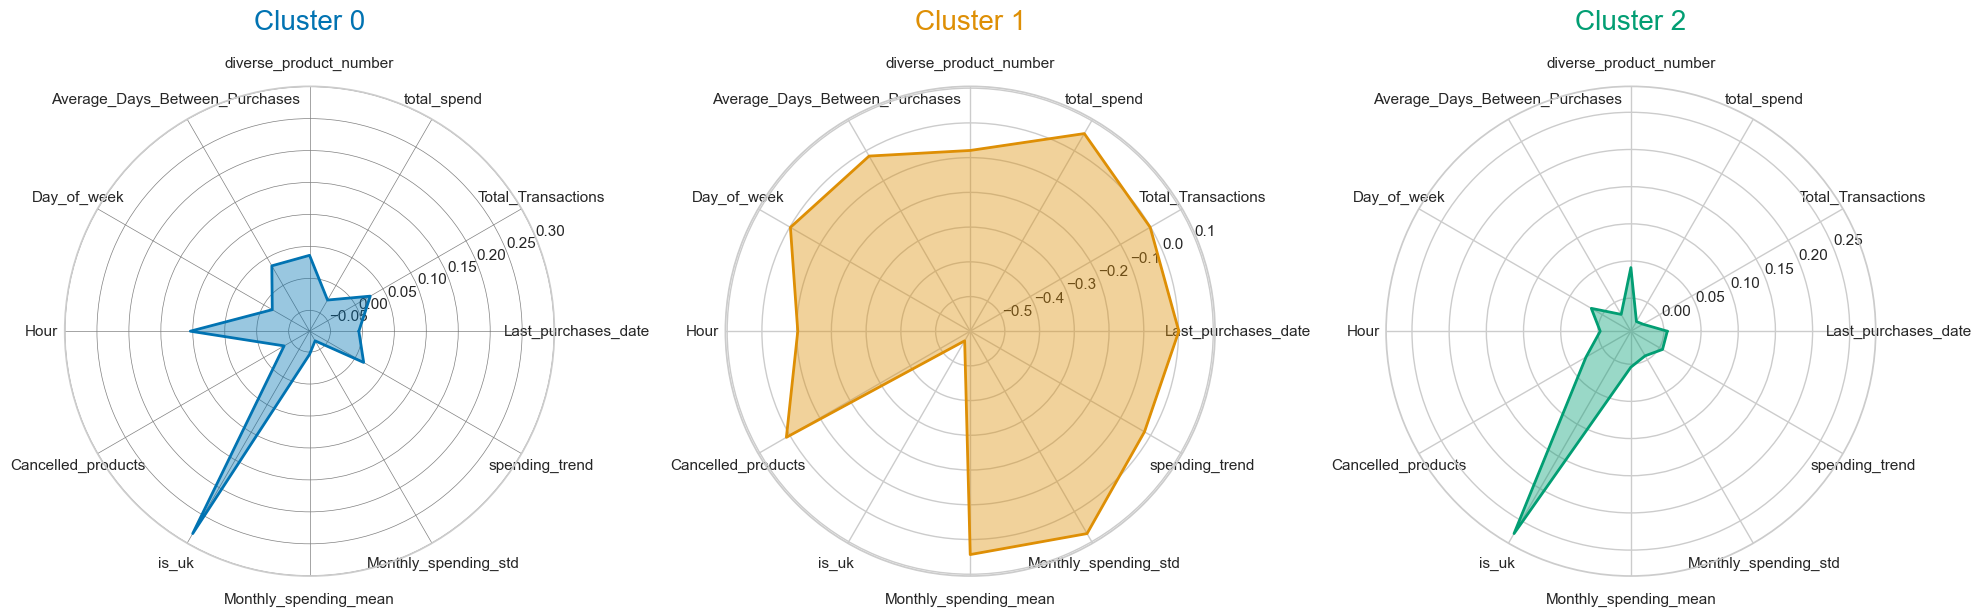

In [440]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = customer_data.set_index('CustomerID')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

# Add a grid
ax[0].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()
    # Plot the data and fill the area


### Inference

We can infer and bring out some conclusions about the clusters:

1. Cluster 0: From the observation, we can see that the customer belonging to this cluster
-  Tend to do hourly shopping(active during some hrs of the time), frequent buyers 
-  They are low-spenders but buy diverse products and their purchase pattern is also frequent. -impulse buyers

We can quote them as "Hourly buying customers" - Push low value fast moving products to lure these customers, increase flash sales or some hourly sale campaign and target these customers

2. Cluster 1: The customer belonging to this cluster
- Are the high spenders, in-frequent buyers, buy diverse products and also have a lot of cancellation
We can address them as Infrequent high spending buyers - try to reduce cancellations, quality control of the products sold,reminder notification to make them come back sooner in the platform

3. Cluster 3: The customers belonging to this cluster
- Are the low-spending customers, the least active ones
We can address them as almost churning customers - Throw reminder notifications on a daily basis,alluring discounts, pushing  variety low value products  

In [408]:
print(cluster_centroids)

         Last_purchases_date  Total_Transactions  total_spend  \
cluster                                                         
0                  -0.005535            0.027038    -0.026354   
1                   0.000918           -0.001401     0.057234   
2                   0.004615           -0.025539    -0.029387   

         diverse_product_number  Average_Days_Between_Purchases  Day_of_week  \
cluster                                                                        
0                      0.036062                        0.035425    -0.015285   
1                     -0.079318                       -0.017494    -0.001938   
2                      0.041184                       -0.018248     0.017090   

             Hour  Cancelled_products     is_uk  Monthly_spending_mean  \
cluster                                                                  
0        0.103917           -0.036681  0.282986              -0.046376   
1       -0.103236            0.011441 -0.567573    